In [2]:
# !pip install cleanlab

In [3]:
%%capture

!wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial_obj/predictions.pkl'
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial_obj/labels.pkl'
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/ObjectDetectionBenchmarking/tutorial_obj/example_images.zip' && unzip -q -o example_images.zip

In [4]:
import pickle
from cleanlab.object_detection.filter import find_label_issues
from cleanlab.object_detection.rank import (
    _separate_label,
    _separate_prediction,
    get_label_quality_scores,
    issues_from_scores,
)
from cleanlab.object_detection.summary import visualize

In [5]:
IMAGE_PATH = './example_images/'  # path to raw image files downloaded above
predictions = pickle.load(open("predictions.pkl", "rb"))
labels = pickle.load(open("labels.pkl", "rb"))

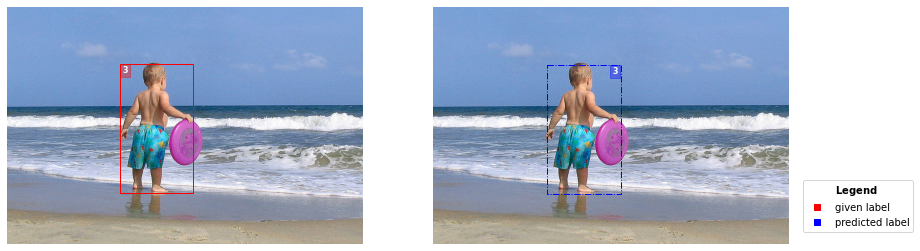

In [8]:
image_to_visualize = 8  # change this to view other images
image_path = IMAGE_PATH + labels[image_to_visualize]['seg_map']
visualize(image_path, label=labels[image_to_visualize], prediction=predictions[image_to_visualize], overlay=False)

In [10]:
len(labels)

118

In [11]:
label_issue_idx = find_label_issues(labels, predictions, return_indices_ranked_by_score=True)

num_examples_to_show = 5 # view this many images flagged with the most severe label issues
label_issue_idx[:num_examples_to_show]

Pruning 0 predictions out of 138 using threshold==0.0. These predictions are no longer considered as potential candidates for identifying label issues as their similarity with the given labels is no longer considered.


array([50, 16, 31, 29, 45])

In [12]:
scores = get_label_quality_scores(labels, predictions)
scores[:num_examples_to_show]

Pruning 0 predictions out of 138 using threshold==0.0. These predictions are no longer considered as potential candidates for identifying label issues as their similarity with the given labels is no longer considered.


array([0.97489622, 0.70610878, 0.98764951, 0.88899237, 0.99085805])

In [13]:
issue_idx = issues_from_scores(scores, threshold=0.5)  # lower threshold will return fewer (but more confident) label issues
issue_idx[:num_examples_to_show], scores[issue_idx][:num_examples_to_show]

(array([50, 16, 31, 29, 45]),
 array([6.95569726e-05, 9.03354841e-05, 8.57510169e-04, 1.58447666e-03,
        2.39755858e-01]))

./example_images/000000009483.jpg | idx 50 | label quality score: 6.95569726168054e-05 | is issue: True


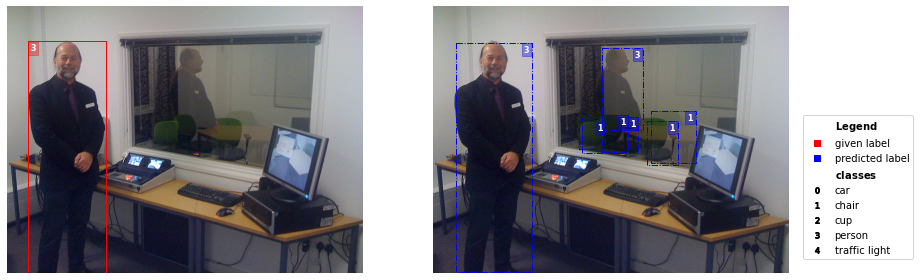

In [14]:
issue_to_visualize = issue_idx[0]  # change this to view other images
class_names = {"0": "car", "1": "chair", "2": "cup", "3":"person", "4": "traffic light"}

label = labels[issue_to_visualize]
prediction = predictions[issue_to_visualize]
score = scores[issue_to_visualize]
image_path = IMAGE_PATH + label['seg_map']

print(image_path, '| idx', issue_to_visualize , '| label quality score:', score, '| is issue: True')
visualize(image_path, label=label, prediction=prediction, class_names=class_names, overlay=False)